<a href="https://colab.research.google.com/github/elfeliza/Machine-Learning-/blob/main/ML_algorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab assignment №1, part 2

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the second part of the assignment. First and third parts are waiting for you in the same directory.*__

## Part 2. Data preprocessing, model training and evaluation.

### 1. Reading the data
Today we work with the [dataset](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Vehicle+Silhouettes%29), describing different cars for multiclass ($k=4$) classification problem. The data is available below.

In [ ]:
# If on colab, uncomment the following lines
! wget https://raw.githubusercontent.com/girafe-ai/ml-course/22f_made/homeworks/lab01_ml_pipeline/car_data.csv

--2022-11-12 19:29:23--  https://raw.githubusercontent.com/girafe-ai/ml-course/22f_made/homeworks/lab01_ml_pipeline/car_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 58374 (57K) [text/plain]
Saving to: ‘car_data.csv’

car_data.csv        100%[===================>]  57.01K  --.-KB/s    in 0.01s   

2022-11-12 19:29:24 (3.85 MB/s) - ‘car_data.csv’ saved [58374/58374]



In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

dataset = pd.read_csv('car_data.csv', delimiter=',', header=None).values
data = dataset[:, :-1].astype(int)
target = dataset[:, -1]

print(data.shape, target.shape)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.35)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(846, 19) (846,)
(549, 19) (549,) (297, 19) (297,)


To get some insights about the dataset, `pandas` might be used. The `train` part is transformed to `pd.DataFrame` below.

In [ ]:
X_train_pd = pd.DataFrame(X_train)

# First 15 rows of our dataset.
X_train_pd.head(15)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,480,104,55,100,201,66,10,214,31,24,173,224,680,221,74,1,1,185,194
1,95,97,50,108,211,65,10,214,31,24,156,232,683,218,72,7,29,188,197
2,452,92,38,74,178,62,9,161,41,20,135,181,388,132,63,7,29,197,206
3,265,80,45,71,128,56,7,151,45,19,147,171,337,176,79,3,16,181,187
4,507,93,35,78,162,60,8,150,45,19,125,172,331,137,67,2,33,191,198
5,512,103,54,107,189,56,11,223,30,25,174,225,729,200,70,0,29,187,201
6,287,88,43,84,136,55,11,154,44,19,150,174,350,164,73,6,2,185,196
7,603,90,36,85,184,64,6,160,41,20,125,187,385,139,66,9,31,195,203
8,415,101,53,108,184,54,12,216,31,24,172,220,685,187,68,4,24,190,201
9,161,107,52,101,218,64,11,202,33,23,164,219,610,192,65,17,2,197,206


Methods `describe` and `info` deliver some useful information.

In [ ]:
X_train_pd.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000
mean,427.193078,93.821494,44.996357,82.579235,170.034608,61.650273,8.475410,170.058288,40.704918,20.679417,148.260474,189.255009,446.706740,175.145719,72.102004,6.362477,12.896175,189.032787,195.872495
std,237.630178,8.375375,6.370552,16.132764,33.073584,7.143581,3.793222,33.937527,7.987467,2.645606,14.997430,31.368027,179.903917,32.923112,6.715312,5.012915,9.151112,6.119165,7.444573
min,1.000000,73.000000,33.000000,40.000000,104.000000,47.000000,3.000000,112.000000,26.000000,17.000000,118.000000,130.000000,184.000000,112.000000,59.000000,0.000000,0.000000,176.000000,181.000000
25%,234.000000,88.000000,40.000000,70.000000,143.000000,57.000000,7.000000,147.000000,32.000000,19.000000,137.000000,167.000000,319.000000,149.000000,67.000000,2.000000,5.000000,185.000000,191.000000
50%,426.000000,93.000000,44.000000,80.000000,169.000000,61.000000,8.000000,158.000000,42.000000,20.000000,146.000000,180.000000,367.000000,174.000000,71.000000,6.000000,11.000000,188.000000,197.000000
75%,628.000000,100.000000,50.000000,98.000000,196.000000,65.000000,10.000000,201.000000,46.000000,23.000000,160.000000,219.000000,610.000000,199.000000,75.000000,9.000000,19.000000,193.000000,201.000000
max,844.000000,119.000000,59.000000,112.000000,322.000000,133.000000,52.000000,265.000000,61.000000,29.000000,188.000000,287.000000,1018.000000,262.000000,119.000000,22.000000,41.000000,204.000000,211.000000


In [ ]:
X_train_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       549 non-null    int64
 1   1       549 non-null    int64
 2   2       549 non-null    int64
 3   3       549 non-null    int64
 4   4       549 non-null    int64
 5   5       549 non-null    int64
 6   6       549 non-null    int64
 7   7       549 non-null    int64
 8   8       549 non-null    int64
 9   9       549 non-null    int64
 10  10      549 non-null    int64
 11  11      549 non-null    int64
 12  12      549 non-null    int64
 13  13      549 non-null    int64
 14  14      549 non-null    int64
 15  15      549 non-null    int64
 16  16      549 non-null    int64
 17  17      549 non-null    int64
 18  18      549 non-null    int64
dtypes: int64(19)
memory usage: 81.6 KB


### 2. Machine Learning pipeline
Here you are supposed to perform the desired transformations. Please, explain your results briefly after each task.

#### 2.0. Data preprocessing
* Make some transformations of the dataset (if necessary). Briefly explain the transformations

In [ ]:
#данные требуют нормировки, так как между значениями может быть большой диапазон, что повлияет на качество модели 
#по нашим данным видно (из describe), что min = 3, max = 844
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

X_train_scale_std = StandardScaler().fit_transform(X_train_pd)
X_train_minmax = MinMaxScaler().fit_transform(X_train_pd)




#### 2.1. Basic logistic regression
* Find optimal hyperparameters for logistic regression with cross-validation on the `train` data (small grid/random search is enough, no need to find the *best* parameters).

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` `tol=1e-3` and ` max_iter=500`.*

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, cross_validate 

data1 = []

for i in ['l1', 'l2', 'none']:
  for j in [100, 10, 1, 0.01]:
    logr = LogisticRegression(penalty= i, tol=1e-3, C=j, solver='saga', max_iter=500, multi_class='multinomial')
    scores = cross_val_score(logr, X_train_scale_std, y_train, cv=5)
    data1.append((scores.mean(), i, j))

data2 =[]
for i in ['l1', 'l2', 'none']:
  for j in [100, 10, 1, 0.01]:
    logr = LogisticRegression(penalty= i, tol=1e-3, C=j, solver='saga', max_iter=500, multi_class='multinomial')
    scores = cross_validate(logr, X_train_scale_std, y_train, cv=15, scoring = ['accuracy', 'f1_weighted'])
    data2.append((scores['test_accuracy'].mean(), scores['test_f1_weighted'].mean(), i, j))



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_rat

KeyboardInterrupt: ignored

In [ ]:
sorted(data2)


[(0.2895895895895896, 0.1301993251345703, 'l1', 0.01),
 (0.6587087087087088, 0.6347067086915067, 'l2', 0.01),
 (0.7685185185185185, 0.7609748008929296, 'l2', 1),
 (0.7756756756756756, 0.7712104190113791, 'l1', 100),
 (0.7775275275275274, 0.7714244874793625, 'l2', 10),
 (0.7775275275275274, 0.7728340769215868, 'none', 1),
 (0.7775275275275274, 0.7728340769215868, 'none', 10),
 (0.7775275275275274, 0.7728340769215868, 'none', 100),
 (0.7775275275275276, 0.7730300321467818, 'l2', 100),
 (0.782982982982983, 0.7775612726532546, 'l1', 10),
 (0.7867367367367366, 0.7808767721247644, 'l1', 1)]

In [ ]:
# You might use this command to install scikit-plot. 
# Warning, if you a running locally, don't call pip from within jupyter, call it from terminal in the corresponding 
# virtual environment instead
! pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


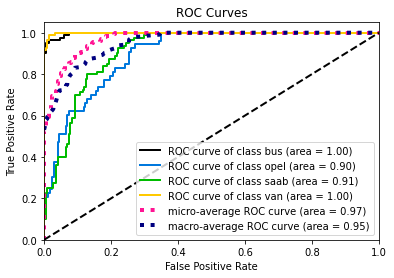

In [ ]:
import scikitplot as skplt

clf = LogisticRegression(penalty = 'l1', multi_class='multinomial', solver='saga', tol=1e-3,max_iter=800, C = 10)
clf.fit(X_train_scale_std, y_train)

SS = StandardScaler().fit(X_train)
SS_test = SS.transform(X_test)

skplt.metrics.plot_roc(y_test, clf.predict_proba(SS_test))


#### 2.2. PCA: explained variance plot
* Apply the PCA to the train part of the data. Build the explaided variance plot. 

Text(0.5, 0, 'Components')

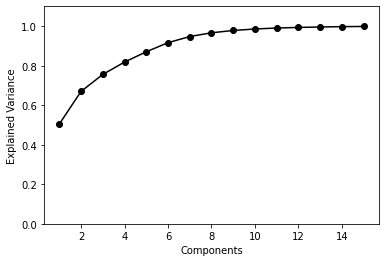

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=15)
pca.fit(X_train_scale_std)

fig, ax = plt.subplots()
xi = np.arange(1, 16, step=1)
y = np.cumsum(pca.explained_variance_ratio_)


plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='-', color='black')
plt.ylabel("Explained Variance")
plt.xlabel("Components")




#### 2.3. PCA trasformation
* Select the appropriate number of components. Briefly explain your choice. Should you normalize the data?

*Use `fit` and `transform` methods to transform the `train` and `test` parts.*

In [ ]:
### по графику видно, что нам хватит 10 компонент
#Нормализация предпочтительна, но не обязательна, но нам нужно центрировать данные, чтобы значительно упростить вычисления

pca = PCA(n_components=10)
pca.fit(X_train_scale_std)
xnew = pca.transform(X_train)
testnew = pca.transform(X_test)

**Note: From this point `sklearn` [Pipeline](https://scikit-learn.org/stable/modules/compose.html) might be useful to perform transformations on the data. Refer to the [docs](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) for more information.**

#### 2.4. Logistic regression on PCA-preprocessed data.
* Find optimal hyperparameters for logistic regression with cross-validation on the transformed by PCA `train` data.

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` and `tol=1e-3`*

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, cross_validate 

data3 = []

for i in ['l1', 'l2', 'none']:
  for j in [100, 10, 1, 0.01]:
    log_pca = LogisticRegression(penalty = 'l1', multi_class='multinomial', solver='saga', tol=1e-3,max_iter=800, C = 10)
    scores = cross_val_score(log_pca, xnew, y_train, cv=5)
    data3.append((scores.mean(), i, j))

data4 =[]
for i in ['l1', 'l2', 'none']:
  for j in [100, 10, 1, 0.01]:
    log_pca = LogisticRegression(penalty= i, tol=1e-3, C=j, solver='saga', max_iter=500, multi_class='multinomial')
    scores = cross_validate(log_pca, xnew, y_train, cv=15, scoring = ['accuracy', 'f1_weighted'])
    data4.append((scores['test_accuracy'].mean(), scores['test_f1_weighted'].mean(), i, j))



KeyboardInterrupt: ignored

In [ ]:
sorted(data4)

In [ ]:
import scikitplot as skplt

roc = LogisticRegression(penalty = 'l1', multi_class='multinomial', solver='saga', tol=1e-3,max_iter=800, C = 1)
roc.fit(xnew, y_train)
skplt.metrics.plot_roc(y_test, roc.predict_proba(testnew))

#### 2.5. Decision tree
* Now train a desicion tree on the same data. Find optimal tree depth (`max_depth`) using cross-validation.

* Measure the model quality using the same metrics you used above.

In [ ]:
from scipy.special import j0
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, cross_validate 

data5 = []

for j in range(1, 15):
    dt = DecisionTreeClassifier(max_depth = j)
    scores = cross_val_score(dt, X_train_scale_std, y_train, cv=5)
    data5.append((scores.mean(), j))

m = []
data6 =[]
for j in range(1, 10):
  dt = DecisionTreeClassifier(max_depth = j)
  scores = cross_validate(dt, X_train_scale_std, y_train, cv=15, scoring = ['accuracy', 'f1_weighted'])
  data6.append((scores['test_accuracy'].mean(), scores['test_f1_weighted'].mean(), i, j))
  m.append(scores['test_accuracy'].mean())
plt.scatter(range(1, 10), m)
plt.ylabel("Асс")
plt.xlabel("Max depth")
plt.ylim(0.0,1.1)

In [ ]:
data5

#### 2.6. Bagging.
Here starts the ensembling part.

First we will use the __Bagging__ approach. Build an ensemble of $N$ algorithms varying N from $N_{min}=2$ to $N_{max}=100$ (with step 5).

We will build two ensembles: of logistic regressions and of decision trees.

*Comment: each ensemble should be constructed from models of the same family, so logistic regressions should not be mixed up with decision trees.*


*Hint 1: To build a __Bagging__ ensebmle varying the ensemble size efficiently you might generate $N_{max}$ subsets of `train` data (of the same size as the original dataset) using bootstrap procedure once. Then you train a new instance of logistic regression/decision tree with optimal hyperparameters you estimated before on each subset (so you train it from scratch). Finally, to get an ensemble of $N$ models you average the $N$ out of $N_{max}$ models predictions.*

*Hint 2: sklearn might help you with this taks. Some appropriate function/class might be out there.*

* Plot `f1` and `accuracy` scores plots w.r.t. the size of the ensemble.

* Briefly analyse the plot. What is the optimal number of algorithms? Explain your answer.

* How do you think, are the hyperparameters for the decision trees you found in 2.5 optimal for trees used in ensemble? 

Text(0.5, 0, 'Max depth')

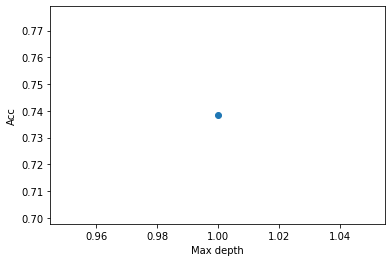

In [ ]:
#Оптимальное количество алгоритмов составляет около 25-80, потому что наша зависимость достаточно шумная
from sklearn.ensemble import BaggingClassifier
LR = LogisticRegression(penalty= "l1", tol=1e-3, solver='saga', max_iter=500, multi_class='multinomial')

data7, data8 =[], []
for i in range(1, 101, 5):
  clf1 = BaggingClassifier(base_estimator = LR, n_estimators=i)
  scoresbag = cross_validate(clf1, X_train_scale_std, y_train, cv=15, scoring = ['accuracy', 'f1_weighted'])
  data7.append((scoresbag['test_accuracy'].mean(), scoresbag['test_f1_weighted'].mean(), i, j))
  data8.append(scoresbag['test_f1_weighted'].mean())

plt.scatter(range(1,101, 5), data8)
plt.ylabel("Асс")
plt.xlabel("Max depth")
plt.ylim(0.0,1.1)

In [ ]:
from sklearn.ensemble import BaggingClassifier
#берем глубину 4, так как по графику видно "dtree", что при такой глубине точность самая высокая

der = DecisionTreeClassifier(max_depth=4)
s1 = []
s2 = []
f1 = []
X = range(2, 103, 5)
for i in X:
  clf = BaggingClassifier(base_estimator=der, n_estimators=i)
  scores = cross_validate(clf, X_train_scale_std, y_train, cv=10, scoring=['accuracy', 'f1_weighted'])
  s1.append({'N':i, 'score':scores['test_accuracy'].mean(), 'f1':scores['test_f1_weighted'].mean()})
  s2.append(scores['test_accuracy'].mean())
  f1.append(scores['test_f1_weighted'].mean())

plt.plot(X, s2)
plt.plot(X, f1)
plt.ylabel("Acc")
plt.xlabel("Estimators")
plt.ylim(0.0,1.1)

#### 2.7. Random Forest
Now we will work with the Random Forest (its `sklearn` implementation).

* * Plot `f1` and `accuracy` scores plots w.r.t. the number of trees in Random Forest.

* What is the optimal number of trees you've got? Is it different from the optimal number of logistic regressions/decision trees in 2.6? Explain the results briefly.

In [ ]:
#RF работает лучше, потому что мы берем не объекты, а выбираем случайное подпространство объектов
from sklearn.ensemble import RandomForestClassifier

data9, data10 =[], []
for i in range(1, 101, 5):
  clf2 = RandomForestClassifier(max_depth=4, n_estimators = i)
  scoresrf = cross_validate(clf2, X_train_scale_std, y_train, cv=15, scoring = ['accuracy', 'f1_weighted'])
  data9.append((scoresrf['test_accuracy'].mean(), scoresrf['test_f1_weighted'].mean(), i))
  data10.append(scoresrf['test_f1_weighted'].mean())

plt.scatter(range(1,101, 5), data10)
plt.ylabel("Acc")
plt.xlabel("Estimators")
plt.ylim(0.0,1.1)


In [ ]:
data10

#### 2.8. Learning curve
Your goal is to estimate, how does the model behaviour change with the increase of the `train` dataset size.

* Split the training data into 10 equal (almost) parts. Then train the models from above (Logistic regression, Desicion Tree, Random Forest) with optimal hyperparameters you have selected on 1 part, 2 parts (combined, so the train size in increased by 2 times), 3 parts and so on.

* Build a plot of `accuracy` and `f1` scores on `test` part, varying the `train` dataset size (so the axes will be score - dataset size.

* Analyse the final plot. Can you make any conlusions using it? 

Text(0, 0.5, 'f1, acc')

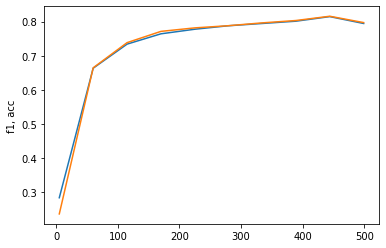

In [ ]:
#по построенным ниже графикам видно, что точность и f1 сначала растут, а затем почти выходят на плато 

from sklearn.metrics import f1_score

lr = LogisticRegression(penalty = 'none', multi_class='multinomial', solver='saga', tol=1e-3, max_iter=800)

sizes = np.arange(0.01, 1.0, 0.1)
accuracy_LR_LC = []
f1_LR_LC = []
indexes = []

for i in sizes:
      idx = int(i * len(X_train_scale_std))
      lr.fit(X_train_scale_std[:idx, :], y_train[:idx])
      indexes.append(idx)
      accuracy_LR_LC.append(lr.score(SS_test, y_test))
      f1_LR_LC.append(f1_score(y_test, lr.predict(SS_test), average = 'weighted'))

plt.plot(indexes, accuracy_LR_LC)
plt.plot(indexes, f1_LR_LC)
plt.ylabel('f1, acc')
plt.ylim(0.0,1.1)

Text(0, 0.5, 'f1, acc')

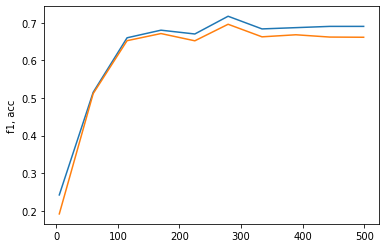

In [ ]:
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier


lr = RandomForestClassifier(max_depth=4, n_estimators = 83)

sizes = np.arange(0.01, 1.0, 0.1)
accuracy_LR_LC = []
f1_LR_LC = []
indexes = []

for i in sizes:
      idx = int(i * len(X_train_scale_std))
      lr.fit(X_train_scale_std[:idx, :], y_train[:idx])
      indexes.append(idx)
      accuracy_LR_LC.append(lr.score(SS_test, y_test))
      f1_LR_LC.append(f1_score(y_test, lr.predict(SS_test), average = 'weighted'))

plt.plot(indexes, accuracy_LR_LC)
plt.plot(indexes, f1_LR_LC)
plt.ylabel('f1, acc')

Text(0, 0.5, 'f1, acc')

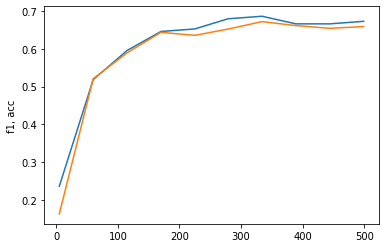

In [ ]:
from sklearn.metrics import f1_score
from sklearn.tree import DecisionTreeClassifier


lr = DecisionTreeClassifier(max_depth = 4)

sizes = np.arange(0.01, 1.0, 0.1)
accuracy_LR_LC = []
f1_LR_LC = []
indexes = []

for i in sizes:
      idx = int(i * len(X_train_scale_std))
      lr.fit(X_train_scale_std[:idx, :], y_train[:idx])
      indexes.append(idx)
      accuracy_LR_LC.append(lr.score(SS_test, y_test))
      f1_LR_LC.append(f1_score(y_test, lr.predict(SS_test), average = 'weighted'))

plt.plot(indexes, accuracy_LR_LC)
plt.plot(indexes, f1_LR_LC)
plt.ylabel('f1, acc')